In [1]:
import sys
import sklearn
import numpy as np
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

mpl.rc("axes", labelsize=14)
mpl.rc("xtick", labelsize=12)
mpl.rc("ytick", labelsize=12)

PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

# Dos Neurônios Biológicos aos Neurônios Artificiais

## A Perceptron

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

iris = load_iris()
X = iris.data[:, (2, 3)]
y = (iris.target == 0).astype(np.int32)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)
y_pred = per_clf.predict([[2, 0.5]])
y_pred

array([1])

## Construindo um classificador de imagens usando a sequential API

In [3]:
from tensorflow import keras

In [4]:
tf.__version__

'2.17.0'

In [5]:
keras.__version__

'3.4.1'

In [6]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [7]:
X_train_full.shape

(60000, 28, 28)

In [8]:
X_train_full.dtype

dtype('uint8')

In [9]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [10]:
class_names = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot",
]

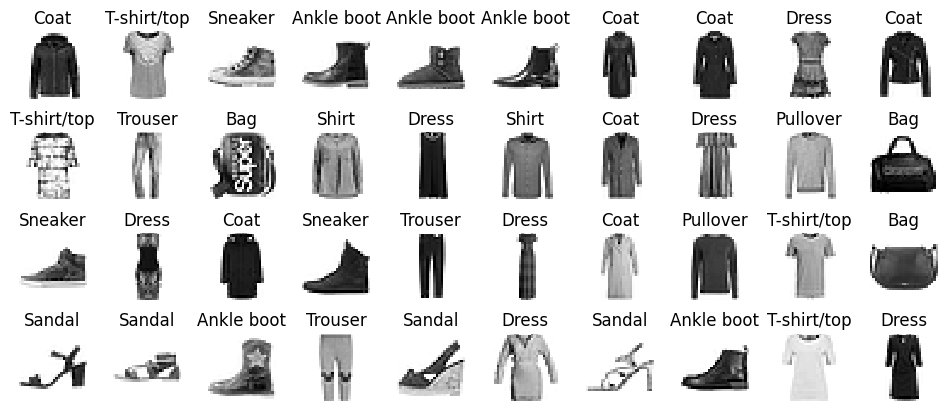

In [11]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Criando o modelo usando a sequential API

In [12]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
model = keras.models.Sequential()
model.add(keras.layers.InputLayer(shape=[28, 28]))
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [14]:
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
hidden1 = model.layers[1]
hidden1.get_weights()

[array([[ 0.05871101,  0.07406153,  0.04851135, ...,  0.04535631,
         -0.0622359 ,  0.0684076 ],
        [ 0.02182347,  0.05751689,  0.0369624 , ...,  0.05356039,
         -0.05397072,  0.00108575],
        [-0.00704934,  0.0260523 ,  0.01500138, ...,  0.04102583,
         -0.07089038,  0.01201987],
        ...,
        [-0.02869345,  0.05429137, -0.00799647, ..., -0.05838956,
          0.01892719, -0.000438  ],
        [ 0.07323401, -0.07431272,  0.03074809, ..., -0.0546019 ,
         -0.05110089, -0.00756323],
        [-0.03900772,  0.05757725, -0.00490751, ...,  0.07336178,
          0.04491193,  0.05890362]], dtype=float32),
 array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.

## Compilando o modelo

In [17]:
model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="sgd",
    metrics=["accuracy"],
)

## Treinando e avaliando o modelo

In [18]:
history = model.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)
)

Epoch 1/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.6701 - loss: 1.0092 - val_accuracy: 0.8224 - val_loss: 0.5298
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8220 - loss: 0.5055 - val_accuracy: 0.8440 - val_loss: 0.4603
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8405 - loss: 0.4503 - val_accuracy: 0.8546 - val_loss: 0.4259
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8522 - loss: 0.4198 - val_accuracy: 0.8586 - val_loss: 0.4056
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8594 - loss: 0.3985 - val_accuracy: 0.8648 - val_loss: 0.3897
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8651 - loss: 0.3818 - val_accuracy: 0.8676 - val_loss: 0.3777
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8695 - loss: 0.3682 - val_accuracy: 0.8700 - val_loss: 0.3690
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.8740 - loss: 0.3564 - 

In [19]:
history.params

{'verbose': 'auto', 'epochs': 30, 'steps': 1719}

In [20]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [21]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

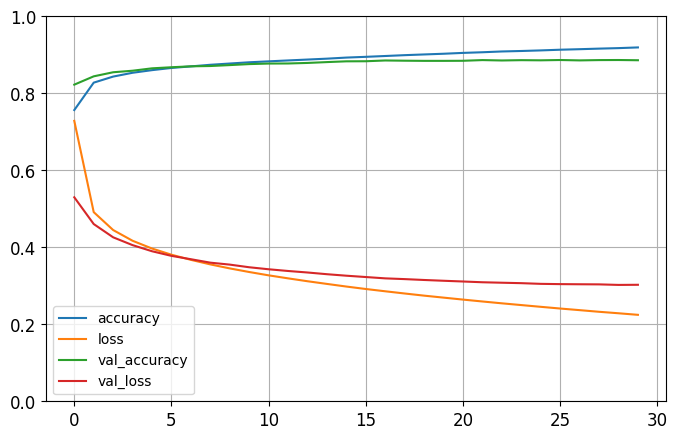

In [22]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [23]:
pd.DataFrame(history.history)

,accuracy,loss,val_accuracy,val_loss
0,0.756400,0.728324,0.8224,0.529843
1,0.827618,0.491309,0.8440,0.460337
2,0.843364,0.444777,0.8546,0.425885
3,0.853273,0.416914,0.8586,0.405579
4,0.860073,0.396738,0.8648,0.389699
5,0.865782,0.380714,0.8676,0.377708
6,0.869818,0.367337,0.8700,0.368977
7,0.874018,0.355534,0.8708,0.360031
8,0.877273,0.345110,0.8732,0.354973
9,0.880509,0.335757,0.8758,0.348108


In [24]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 718us/step - accuracy: 0.8423 - loss: 70.3445


[72.35263061523438, 0.8374999761581421]

## Usando o modelo para fazer predições

In [25]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [26]:
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


array([9, 2, 1], dtype=int64)

In [27]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

## Construindo uma MLP de regressão usando a sequential API

In [28]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42
)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42
)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [29]:
np.random.seed(42)
tf.random.set_seed(42)

In [30]:
model = keras.models.Sequential(
    [
        keras.layers.InputLayer(shape=X_train.shape[1:]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1),
    ]
)

model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
)

history = model.fit(
    X_train, y_train, epochs=30, validation_data=(X_valid, y_valid)
)
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 840us/step - loss: 3.1665 - val_loss: 0.8768
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step - loss: 0.8599 - val_loss: 0.7285
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 635us/step - loss: 0.7745 - val_loss: 0.6778
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 638us/step - loss: 0.7323 - val_loss: 0.6407
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 621us/step - loss: 0.6960 - val_loss: 0.6088
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 637us/step - loss: 0.6638 - val_loss: 0.5808
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 626us/step - loss: 0.6354 - val_loss: 0.5562
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.6101 - val_loss: 0.5343
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 619us/step - loss: 0.5876 - val_loss: 0.5150
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 630us/step - loss: 0.5676 - val_loss: 0.4980
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 611us/step - loss: 0.5498 - val_loss: 0.4830
Epoch 12/30
363/363 ━━━━━━━━━━

In [31]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 30)             │           270 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 303 (1.19 KB)

 Trainable params: 301 (1.18 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

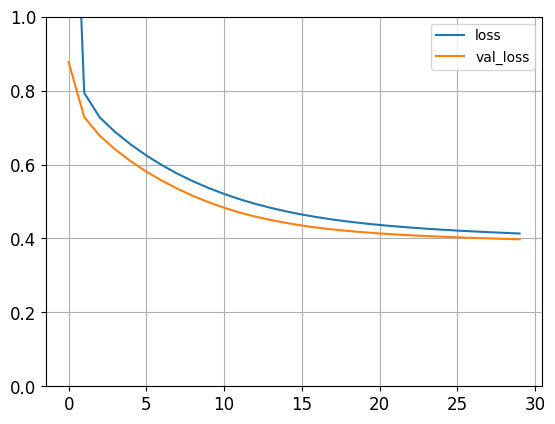

In [32]:
pd.DataFrame(history.history).plot()
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [33]:
mse_test

0.4077690541744232

In [34]:
y_pred

array([[0.6198999],
       [1.6756823],
       [3.3608308]], dtype=float32)

In [35]:
y_test[:3]

array([0.477  , 0.458  , 5.00001])

## Construindo um modelo complexo usando a functional API

In [36]:
np.random.seed(42)
tf.random.set_seed(42)

In [37]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [38]:
model.summary()

Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 8)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 30)        │        270 │ input_layer_2[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 30)        │        930 │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 38)        │          0 │ input_layer_2[0]… │
│ (Concatenate)       │                   │            │ dense_6[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_7 (Dense)     │ (None, 1)         │         39 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 1,239 (4.84 KB)

 Trainable params: 1,239 (4.84 KB)

 Non-trainable params: 0 (0.00 B)

In [39]:
model.compile(
    loss="mean_squared_error",
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
)
history = model.fit(
    X_train, y_train, epochs=20, validation_data=(X_valid, y_valid)
)
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 940us/step - loss: 3.0204 - val_loss: 1.4509
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 695us/step - loss: 0.7126 - val_loss: 0.8634
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 683us/step - loss: 0.6594 - val_loss: 0.5624
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 699us/step - loss: 0.6212 - val_loss: 0.5501
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 746us/step - loss: 0.5912 - val_loss: 0.5129
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 749us/step - loss: 0.5657 - val_loss: 0.4976
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 726us/step - loss: 0.5441 - val_loss: 0.4809
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 697us/step - loss: 0.5256 - val_loss: 0.4692
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 692us/step - loss: 0.5099 - val_loss: 0.4569
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 763us/step - loss: 0.4965 - val_loss: 0.4479
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 810us/step - loss: 0.4852 - val_loss: 0.4395
Epoch 12/20
363/363 ━━━━━━━━━━

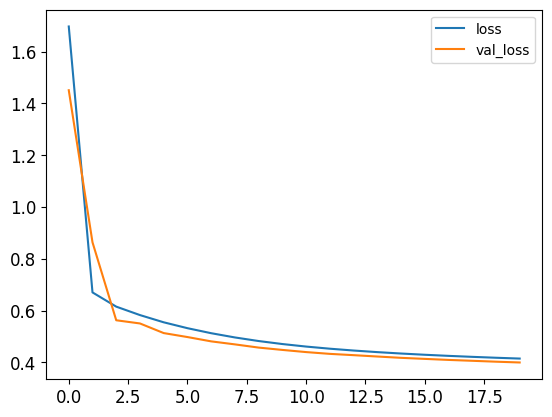

In [40]:
pd.DataFrame(history.history).plot()
plt.show()

In [41]:
np.random.seed(42)
tf.random.set_seed(42)

In [42]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2)
model = keras.models.Model(
    inputs=[input_A, input_B], outputs=[output, aux_output]
)

In [43]:
X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

In [44]:
model.compile(
    loss=["mse", "mse"],
    loss_weights=[0.9, 0.1],
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
)

history = model.fit(
    [X_train_A, X_train_B],
    [y_train, y_train],
    epochs=20,
    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]),
)

Epoch 1/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.6151 - val_loss: 1.1287
Epoch 2/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.9682 - val_loss: 0.9602
Epoch 3/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.8100 - val_loss: 0.9579
Epoch 4/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.7289 - val_loss: 0.9502
Epoch 5/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - loss: 0.6797 - val_loss: 0.9220
Epoch 6/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 786us/step - loss: 0.6462 - val_loss: 0.8852
Epoch 7/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 784us/step - loss: 0.6218 - val_loss: 0.8448
Epoch 8/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.6030 - val_loss: 0.8049
Epoch 9/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.5879 - val_loss: 0.7676
Epoch 10/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.5755 - val_loss: 0.7339
Epoch 11/20
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 823us/step - loss: 0.5651 - val_loss: 0.7035
Epoch 12/20
363/363 ━━━━━━━━━━━━

In [45]:
total_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 500us/step - loss: 0.4866
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


In [46]:
total_loss

0.4828740954399109

In [47]:
y_pred_main

array([[0.31327924],
       [1.8783503 ],
       [3.2065027 ]], dtype=float32)

In [48]:
y_pred_aux

array([[1.1567037],
       [1.8089992],
       [2.8386497]], dtype=float32)

## Utilizando a subclassing API para construir modelos dinâmicos

In [49]:
class WideAndDeepModel(keras.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)

    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output


model = WideAndDeepModel()

In [50]:
model.summary()

Model: "wide_and_deep_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [51]:
model.compile(
    loss=["mse", "mse"],
    loss_weights=[0.9, 0.1],
    optimizer=keras.optimizers.SGD(learning_rate=1e-3),
)
history = model.fit(
    (X_train_A, X_train_B),
    (y_train, y_train),
    epochs=10,
    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)),
)
total_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 4.6259 - val_loss: 1.8038
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 799us/step - loss: 1.3472 - val_loss: 1.1049
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 774us/step - loss: 0.9851 - val_loss: 1.0390
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.8441 - val_loss: 1.0383
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.7727 - val_loss: 1.0045
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 771us/step - loss: 0.7270 - val_loss: 0.9436
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.6929 - val_loss: 0.8736
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 785us/step - loss: 0.6652 - val_loss: 0.8098
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 783us/step - loss: 0.6420 - val_loss: 0.7526
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.6224 - val_loss: 0.7024
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 503us/step - loss: 0.5782
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


In [52]:
model.summary()

Model: "wide_and_deep_model"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_10 (Dense)                │ (None, 30)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 30)             │           930 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 1)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 1)              │            31 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,209 (4.73 KB)

 Trainable params: 1,207 (4.71 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 2 (12.00 B)

## Usando as funções callbacks

In [53]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [54]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=[8]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1),
    ]
)

In [55]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint(
    "my_keras_model.keras", save_best_only=True
)
history = model.fit(
    X_train,
    y_train,
    epochs=10,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb],
)
model = keras.models.load_model(
    "my_keras_model.keras"
)  # rollback to best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 3.4263 - val_loss: 0.9855
Epoch 2/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 791us/step - loss: 0.8864 - val_loss: 0.7519
Epoch 3/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 914us/step - loss: 0.7564 - val_loss: 0.7281
Epoch 4/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 821us/step - loss: 0.7032 - val_loss: 0.6841
Epoch 5/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 837us/step - loss: 0.6617 - val_loss: 0.6349
Epoch 6/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 773us/step - loss: 0.6272 - val_loss: 0.5951
Epoch 7/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 755us/step - loss: 0.5980 - val_loss: 0.5568
Epoch 8/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 775us/step - loss: 0.5726 - val_loss: 0.5264
Epoch 9/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 788us/step - loss: 0.5503 - val_loss: 0.5010
Epoch 10/10
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 796us/step - loss: 0.5308 - val_loss: 0.4787
162/162 ━━━━━━━━━━━━━━━━━━━━ 0s 440us/step - loss: 0.4976


In [56]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(
    patience=10, restore_best_weights=True
)
history = model.fit(
    X_train,
    y_train,
    epochs=100,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, early_stopping_cb],
)
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.5138 - val_loss: 0.4603
Epoch 2/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 768us/step - loss: 0.4989 - val_loss: 0.4446
Epoch 3/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 760us/step - loss: 0.4859 - val_loss: 0.4315
Epoch 4/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 776us/step - loss: 0.4745 - val_loss: 0.4198
Epoch 5/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 764us/step - loss: 0.4643 - val_loss: 0.4106
Epoch 6/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 782us/step - loss: 0.4554 - val_loss: 0.4026
Epoch 7/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 761us/step - loss: 0.4474 - val_loss: 0.3958
Epoch 8/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 778us/step - loss: 0.4403 - val_loss: 0.3900
Epoch 9/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 757us/step - loss: 0.4341 - val_loss: 0.3849
Epoch 10/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 750us/step - loss: 0.4284 - val_loss: 0.3804
Epoch 11/100
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 762us/step - loss: 0.4234 - val_loss: 0.3765
Epoch 12/100
363/363 

## Usando o TensorBoard para visualização

In [57]:
root_logdir = os.path.join(os.curdir, "my_logs")


def get_run_logdir():
    import time

    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)


run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2024_07_28-20_30_18'

In [58]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [59]:
model = keras.models.Sequential(
    [
        keras.layers.Input(shape=[8]),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(30, activation="relu"),
        keras.layers.Dense(1),
    ]
)

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [60]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(
    X_train,
    y_train,
    epochs=30,
    validation_data=(X_valid, y_valid),
    callbacks=[checkpoint_cb, tensorboard_cb],
)

Epoch 1/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 2.3788 - val_loss: 0.9447
Epoch 2/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 951us/step - loss: 0.7985 - val_loss: 0.6781
Epoch 3/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 987us/step - loss: 0.7158 - val_loss: 0.6050
Epoch 4/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 922us/step - loss: 0.6625 - val_loss: 0.5576
Epoch 5/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 895us/step - loss: 0.6195 - val_loss: 0.5219
Epoch 6/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 937us/step - loss: 0.5852 - val_loss: 0.4945
Epoch 7/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 897us/step - loss: 0.5573 - val_loss: 0.4733
Epoch 8/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 893us/step - loss: 0.5341 - val_loss: 0.4569
Epoch 9/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step - loss: 0.5146 - val_loss: 0.4444
Epoch 10/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step - loss: 0.4985 - val_loss: 0.4349
Epoch 11/30
363/363 ━━━━━━━━━━━━━━━━━━━━ 0s 908us/step - loss: 0.4851 - val_loss: 0.4275
Epoch 12/30
363/363 ━━━━━━━━━━━━